In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 准备多标签数据集

In [3]:
data_path = r"C:\Users\yu\Desktop\新进项目\多标签多分类机器学习\data\E.csv"
df = pd.read_csv(data_path)
df.head()

,drug_id,smiles,hsa_id
0,DB01592,[Fe],hsa54583
1,DB01592,[Fe],hsa2495
2,DB01592,[Fe],hsa5423
3,DB01592,[Fe],hsa1356
4,DB01592,[Fe],hsa55869


# SMILES的指纹转换

In [4]:
# 将 SMILES 字符串转换为 Morgan 指纹
def smiles_to_fingerprints(smiles, radius=1, nBits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
    else:
        return [0] * nBits

# 应用转换
df['fingerprints'] = df['smiles'].apply(lambda x: smiles_to_fingerprints(x))

# 将指纹转换为特征矩阵
X = np.array(list(df['fingerprints']))

X


[14:37:57] WARNING: not removing hydrogen atom without neighbors
[14:37:57] WARNING: not removing hydrogen atom without neighbors
[14:37:57] WARNING: not removing hydrogen atom without neighbors
[14:37:57] WARNING: not removing hydrogen atom without neighbors
[14:37:57] WARNING: not removing hydrogen atom without neighbors
[14:37:57] WARNING: not removing hydrogen atom without neighbors
[14:37:57] WARNING: not removing hydrogen atom without neighbors
[14:37:57] WARNING: not removing hydrogen atom without neighbors


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
# 转换标签列（假设 hsa_id 是多标签）
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df['hsa_id'].str.split(';'))

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 使用二进制相关性和朴素贝叶斯创建多标签分类器
classifier = BinaryRelevance(GaussianNB())

In [6]:
# 训练模型
classifier.fit(X_train, Y_train)

BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [7]:
# 进行预测
predictions = classifier.predict(X_test)

predictions

<2212x1411 sparse matrix of type '<class 'numpy.intc'>'
	with 54090 stored elements in Compressed Sparse Column format>

In [8]:
# 计算准确率
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.0162748643761302


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\y

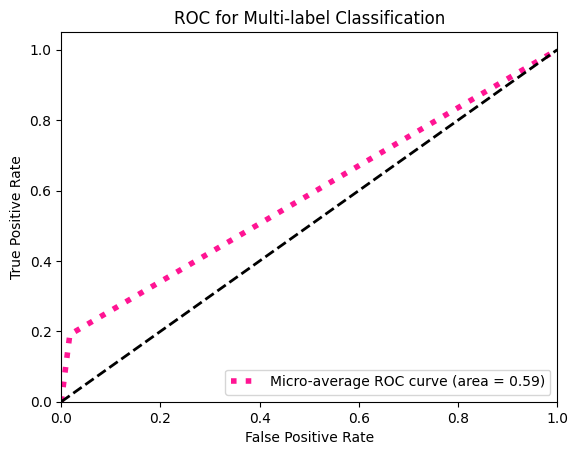

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 假设 Y_test 是真实的多标签数据，predictions 是模型的预测结果
# 由于这里没有实际数据，以下代码仅为示例

# Binarize the output (这是一个多类别问题，所以需要转换成二进制格式)
n_classes = Y_test.shape[1]
Y_test_bin = label_binarize(Y_test, classes=[i for i in range(n_classes)])
predictions_bin = label_binarize(predictions, classes=[i for i in range(n_classes)])

# 计算每个类别的 ROC 曲线和 AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 为了简约，我们可以选择画平均的 ROC 曲线
# 计算微观平均 ROC 曲线和 AUC
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), predictions_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 绘制 ROC 曲线
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# 绘制其他细节
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multi-label Classification')
plt.legend(loc="lower right")
plt.show()



c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\y

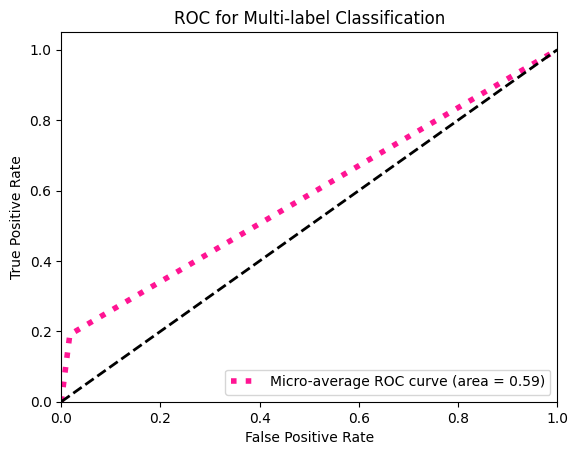

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 假设 Y_test 和 predictions 是 NumPy 数组
# Y_test = ...
# predictions = ...

# Binarize the output (需要将多标签数据转换为二进制格式)
n_classes = Y_test.shape[1]
Y_test_bin = label_binarize(Y_test, classes=[i for i in range(n_classes)])
predictions_bin = label_binarize(predictions, classes=[i for i in range(n_classes)])

# 计算每个类别的 ROC 曲线和 AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 计算微观平均 ROC 曲线和 AUC
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), predictions_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 绘制 ROC 曲线
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# 绘制其他细节
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multi-label Classification')
plt.legend(loc="lower right")
plt.show()


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


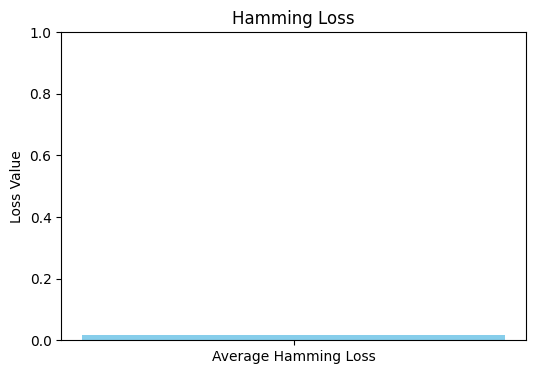

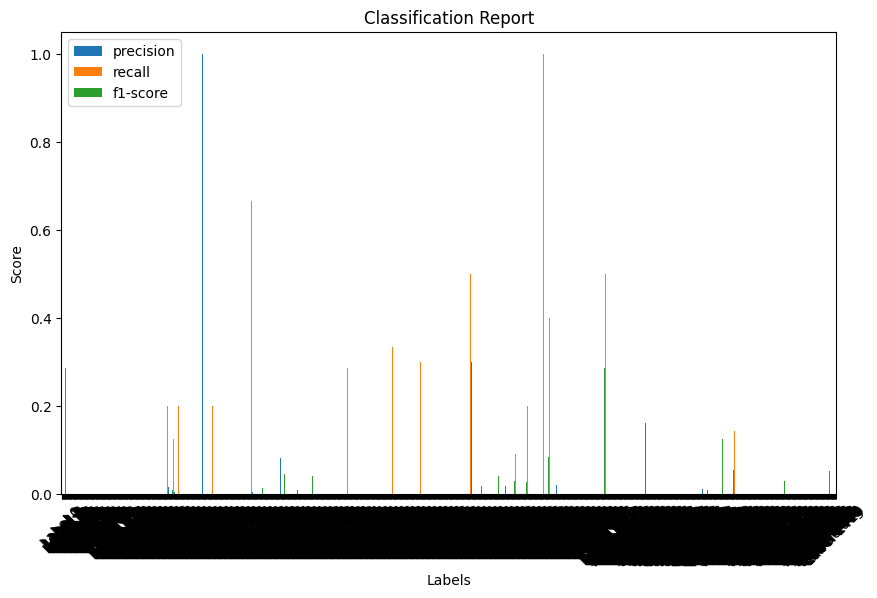

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import hamming_loss, classification_report


# 计算 Hamming Loss
hamming_loss_value = hamming_loss(Y_test, predictions)

# 计算分类报告
n_classes = Y_test.shape[1]
class_report = classification_report(Y_test, predictions, target_names=[f'Label {i}' for i in range(n_classes)], output_dict=True)

# 将分类报告转换为 DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# 绘制 Hamming Loss (使用平均值)
plt.figure(figsize=(6, 4))
plt.bar(['Average Hamming Loss'], [np.mean(hamming_loss_value)], color='skyblue')
plt.title('Hamming Loss')
plt.ylabel('Loss Value')
plt.ylim(0, 1)  # Hamming Loss 值在 0 到 1 之间
plt.show()

# 绘制分类报告 (对于标签过多的情况进行优化)
class_report_df.drop(['support'], axis=1).iloc[:-3].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.ylabel('Score')
plt.xlabel('Labels')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x800 with 0 Axes>

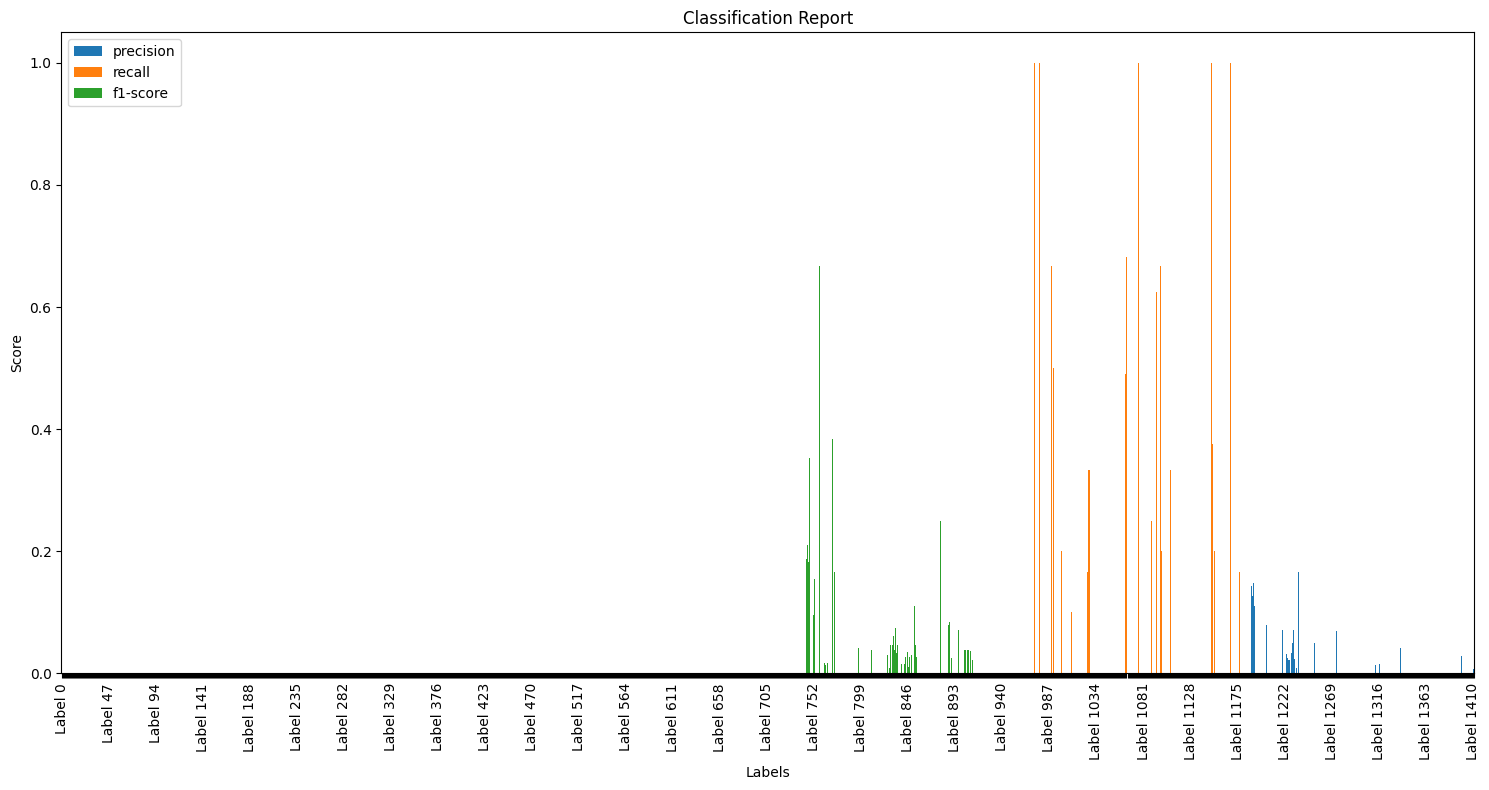

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# 计算分类报告
n_classes = Y_test.shape[1]
class_report = classification_report(Y_test, predictions, target_names=[f'Label {i}' for i in range(n_classes)], output_dict=True)

# 将分类报告转换为 DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# 选择显示标签的间隔
label_interval = max(len(class_report_df) // 30, 1)  # 例如，如果有300个标签，则每10个显示一个标签

# 绘制分类报告
plt.figure(figsize=(15, 8))
class_report_df.drop(['support'], axis=1).iloc[:-3].plot(kind='bar', figsize=(15, 8))
plt.title('Classification Report')
plt.ylabel('Score')
plt.xlabel('Labels')
plt.xticks(rotation=90)
plt.gca().set_xticklabels([label if idx % label_interval == 0 else '' for idx, label in enumerate(class_report_df.index[:-3])])
plt.legend(loc='upper left')
plt.tight_layout()  # 调整布局以适应标签
plt.show()


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\y

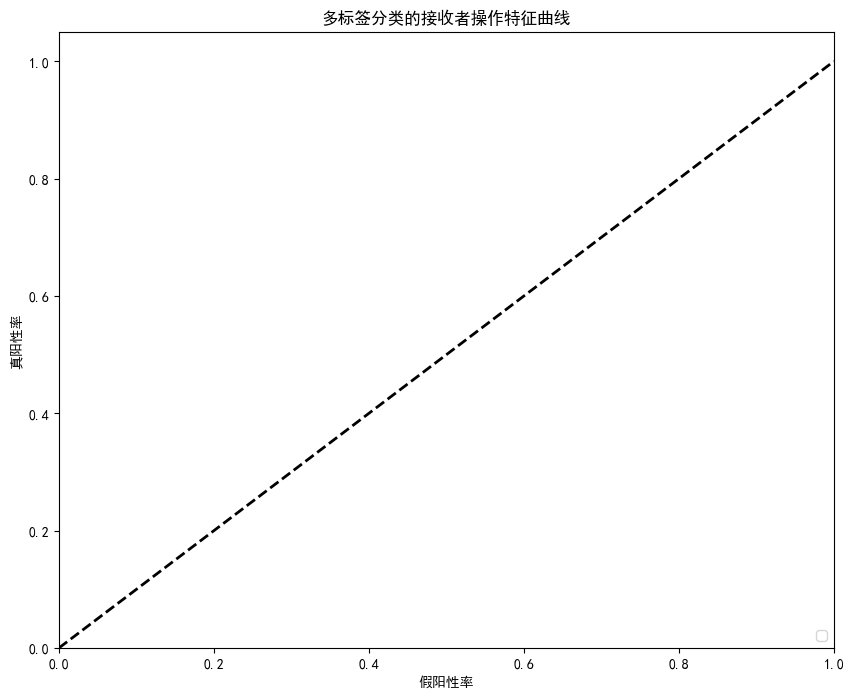

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.rcParams['font.family'] = 'SimHei'  # 设置字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 计算每个标签的 ROC 曲线和 AUC
def plot_multilabel_roc(Y_test, predictions, n_labels):
    fig, ax = plt.subplots(figsize=(10, 8))

    # 计算和绘制每个标签的 ROC 曲线和 AUC
    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(Y_test[:, i], predictions.toarray()[:, i])
        roc_auc = auc(fpr, tpr)
        # ax.plot(fpr, tpr, lw=2, label='标签 {0} 的 AUC = {1:0.2f}'.format(i, roc_auc))

    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('假阳性率')
    ax.set_ylabel('真阳性率')
    ax.set_title('多标签分类的接收者操作特征曲线')
    ax.legend(loc="lower right")
    plt.show()

# 假设 predictions 是模型的预测结果
plot_multilabel_roc(Y_test, predictions, Y.shape[1])


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\y

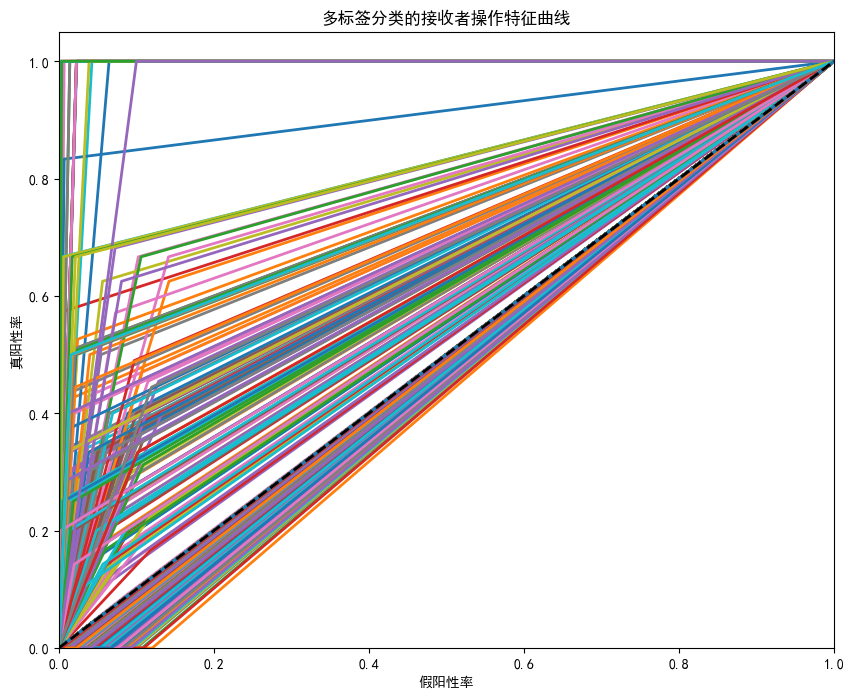

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 计算并绘制每个标签的 ROC 曲线和 AUC
def plot_multilabel_roc(Y_test, predictions, n_labels):
    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(Y_test[:, i], predictions.toarray()[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label='标签 {0} 的 AUC = {1:0.2f}'.format(i, roc_auc))

    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('假阳性率')
    ax.set_ylabel('真阳性率')
    ax.set_title('多标签分类的接收者操作特征曲线')
    # 不显示图例
    # ax.legend(loc="lower right")
    plt.show()

# 使用这个函数绘制 ROC 曲线
plot_multilabel_roc(Y_test, predictions, Y.shape[1])


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\y

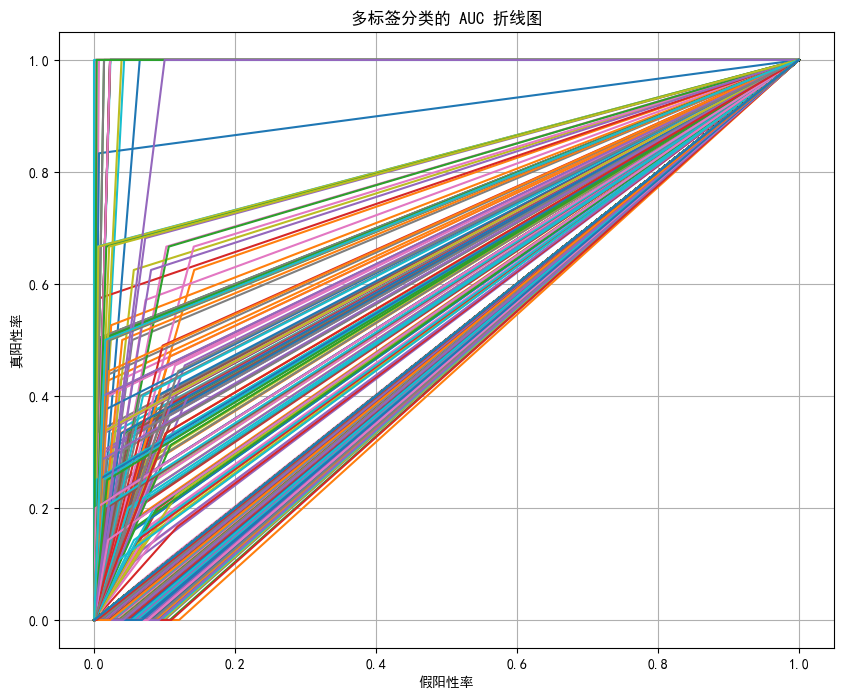

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 计算并绘制每个标签的折线图
def plot_multilabel_line_chart(Y_test, predictions, n_labels):
    fig, ax = plt.subplots(figsize=(10, 8))

    # 遍历每个标签
    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(Y_test[:, i], predictions.toarray()[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'标签 {i} 的 AUC = {roc_auc:.2f}')

    ax.set_xlabel('假阳性率')
    ax.set_ylabel('真阳性率')
    ax.set_title('多标签分类的 AUC 折线图')
    plt.grid(True)
    plt.show()

# 使用这个函数绘制折线图
plot_multilabel_line_chart(Y_test, predictions, Y.shape[1])


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklea

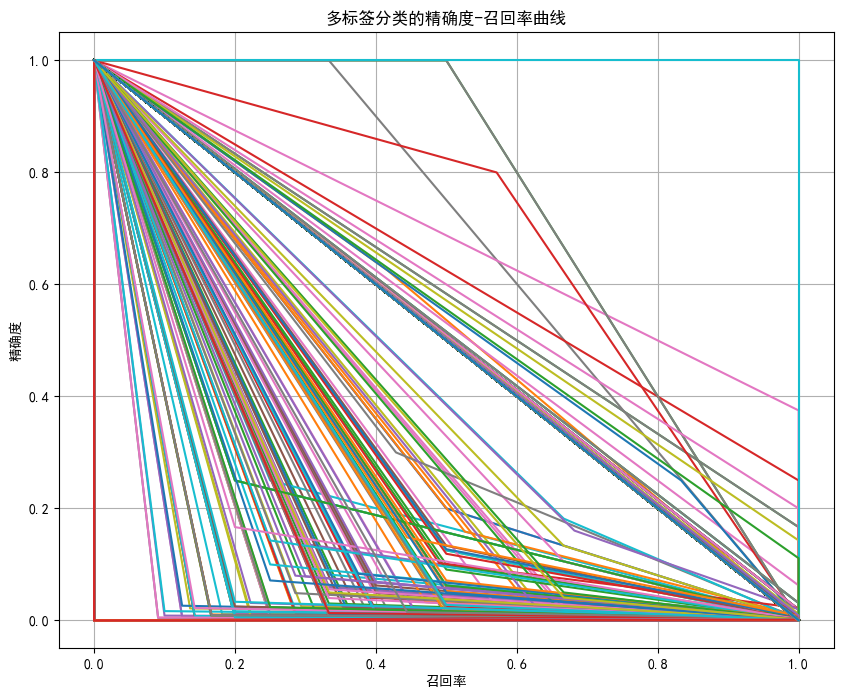

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# 计算并绘制每个标签的精确度-召回率曲线
def plot_multilabel_precision_recall(Y_test, predictions, n_labels):
    fig, ax = plt.subplots(figsize=(10, 8))

    # 遍历每个标签
    for i in range(n_labels):
        precision, recall, _ = precision_recall_curve(Y_test[:, i], predictions.toarray()[:, i])
        avg_precision = average_precision_score(Y_test[:, i], predictions.toarray()[:, i])
        ax.plot(recall, precision, label=f'标签 {i} 的平均精确度 = {avg_precision:.2f}')

    ax.set_xlabel('召回率')
    ax.set_ylabel('精确度')
    ax.set_title('多标签分类的精确度-召回率曲线')
    plt.grid(True)
    plt.show()

# 使用这个函数绘制精确度-召回率曲线
plot_multilabel_precision_recall(Y_test, predictions, Y.shape[1])


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklea

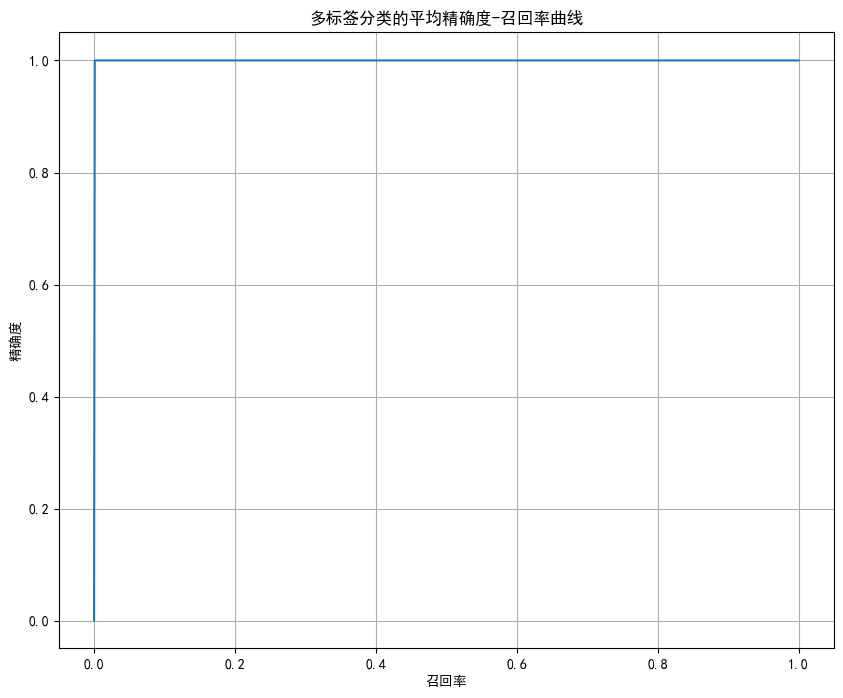

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

# 假设 Y_test 是真实的标签矩阵，predictions 是预测的概率矩阵
# Y_test = ...
# predictions = ...

# 如果 predictions 是稀疏矩阵，需要转换成密集数组
if hasattr(predictions, "toarray"):
    predictions = predictions.toarray()

n_labels = Y_test.shape[1]

# 插值到共同的召回率点集合
common_recall = np.linspace(0, 1, 1000)
interp_precisions = []

# 累计所有曲线的插值精确度
for i in range(n_labels):
    precision, recall, _ = precision_recall_curve(Y_test[:, i], predictions[:, i])
    # 插值精确度
    interp_precision = np.interp(common_recall, recall, precision)
    interp_precisions.append(interp_precision)

# 计算所有曲线的平均插值精确度
mean_precision = np.mean(interp_precisions, axis=0)

# 绘制平均精确度-召回率曲线
plt.figure(figsize=(10, 8))
plt.plot(common_recall, mean_precision, label='平均精确度-召回率曲线')
plt.xlabel('召回率')
plt.ylabel('精确度')
plt.title('多标签分类的平均精确度-召回率曲线')
plt.grid(True)
plt.show()


In [20]:
from sklearn.metrics import roc_auc_score, average_precision_score
import numpy as np


auc_scores = []
for i in range(Y_test.shape[1]):
    if len(np.unique(Y_test[:, i])) > 1:  # 检查是否有多于一个类别
        auc_score = roc_auc_score(Y_test[:, i], predictions[:, i])
        auc_scores.append(auc_score)

# 计算每个标签的 AUPR
aupr_scores = [average_precision_score(Y_test[:, i], predictions[:, i]) for i in range(Y_test.shape[1])]

# 计算平均 AUC 和 AUPR（跳过无法计算的标签）
mean_auc = np.mean(auc_scores) if len(auc_scores) > 0 else float('nan')
mean_aupr = np.mean(aupr_scores)

print("Average AUC: ", mean_auc)
print("Average AUPR: ", mean_aupr)


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklea

Average AUC:  0.5359752607713667
Average AUPR:  0.006062193804036748


c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\yu\anaconda3\envs\py39\lib\site-packages\sklea